### Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

### Reading the excel sheet

In [5]:
df = pd.read_excel('C:/Users/youse/OneDrive/Desktop/RFM ANALYSIS.xlsx',skiprows=4, engine="openpyxl")
df.head()

,#,Code,Name,RECENCY,Unnamed: 4,FREQUENCY,MONETARY
0,1,PL000171C,AL SHOROUQ 2016 FOR CLY BRICKS CO.,0,NaN,0,0
1,2,PL000170C,Reema glading factory,2025-03-24,NaN,1,"1,500.00\t"
2,3,PL000169C,Tyne Gulf Industrial Company,2025-03-12,NaN,1,"3,838.13\t"
3,4,PL000168C,ALKHORAYEF,0,NaN,0,0
4,5,PL000167C,Fulath Factory,0,NaN,0,0


### Data processing

In [6]:
df.drop(columns=['Unnamed: 4','#'],axis = 1, inplace=True)

In [7]:
df.head()

,Code,Name,RECENCY,FREQUENCY,MONETARY
0,PL000171C,AL SHOROUQ 2016 FOR CLY BRICKS CO.,0,0,0
1,PL000170C,Reema glading factory,2025-03-24,1,"1,500.00\t"
2,PL000169C,Tyne Gulf Industrial Company,2025-03-12,1,"3,838.13\t"
3,PL000168C,ALKHORAYEF,0,0,0
4,PL000167C,Fulath Factory,0,0,0


In [8]:
df.shape

(162, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Code       162 non-null    object
 1   Name       162 non-null    object
 2   RECENCY    162 non-null    object
 3   FREQUENCY  162 non-null    int64 
 4   MONETARY   162 non-null    object
dtypes: int64(1), object(4)
memory usage: 6.5+ KB


In [10]:
df.isna().sum()

Code         0
Name         0
RECENCY      0
FREQUENCY    0
MONETARY     0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['MONETARY'] = df['MONETARY'].replace('[\$,]', '', regex=True)
df['MONETARY'] = df['MONETARY'].astype(float)

In [13]:
df.loc[df['RECENCY'] != 0, 'RECENCY'] = pd.to_datetime(df.loc[df['RECENCY'] != 0, 'RECENCY'], format='%Y-%m-%d', errors='coerce')
df['RECENCY'] = df['RECENCY'].replace(0, pd.NaT)
df['RECENCY'] = pd.to_datetime(df['RECENCY'], format='%Y-%m-%d', errors='coerce')


In [14]:
df['RECENCY'].fillna(0, inplace=True)

In [15]:
df.head()

,Code,Name,RECENCY,FREQUENCY,MONETARY
0,PL000171C,AL SHOROUQ 2016 FOR CLY BRICKS CO.,0,0,0.00
1,PL000170C,Reema glading factory,2025-03-24 00:00:00,1,1500.00
2,PL000169C,Tyne Gulf Industrial Company,2025-03-12 00:00:00,1,3838.13
3,PL000168C,ALKHORAYEF,0,0,0.00
4,PL000167C,Fulath Factory,0,0,0.00


In [16]:
df['RECENCY'] = df['RECENCY'].astype('datetime64[ns]')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Code       162 non-null    object        
 1   Name       162 non-null    object        
 2   RECENCY    162 non-null    datetime64[ns]
 3   FREQUENCY  162 non-null    int64         
 4   MONETARY   162 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 6.5+ KB


### RFM Analysis

In [18]:
present_time = datetime.now()

In [19]:
rfm = df.copy()

# Store present time
present_time = pd.to_datetime("today")  # or datetime.now()

# Rename RECENCY column to LastPurchaseDate
rfm = rfm.rename(columns={'RECENCY': 'LastPurchaseDate'})

# Replace 1970-01-01 with NaT (Not a Time)
rfm['LastPurchaseDate'] = rfm['LastPurchaseDate'].replace(pd.to_datetime("1970-01-01"), pd.NaT)

# Calculate RECENCY (days since last purchase)
rfm['RECENCY'] = (present_time - rfm['LastPurchaseDate']).dt.days

# For customers with no purchase (NaT), set RECENCY to 0 or some large number
rfm['RECENCY'] = rfm['RECENCY'].fillna(0)  # or fill with a large number like 9999 if you prefer

rfm.head()

,Code,Name,LastPurchaseDate,FREQUENCY,MONETARY,RECENCY
0,PL000171C,AL SHOROUQ 2016 FOR CLY BRICKS CO.,NaT,0,0.00,0.0
1,PL000170C,Reema glading factory,2025-03-24,1,1500.00,37.0
2,PL000169C,Tyne Gulf Industrial Company,2025-03-12,1,3838.13,49.0
3,PL000168C,ALKHORAYEF,NaT,0,0.00,0.0
4,PL000167C,Fulath Factory,NaT,0,0.00,0.0


In [20]:
rfm['RECENCY'] = rfm['RECENCY'].astype(int)
rfm['FREQUENCY'] = rfm['FREQUENCY'].astype(int)
rfm.head()

,Code,Name,LastPurchaseDate,FREQUENCY,MONETARY,RECENCY
0,PL000171C,AL SHOROUQ 2016 FOR CLY BRICKS CO.,NaT,0,0.00,0
1,PL000170C,Reema glading factory,2025-03-24,1,1500.00,37
2,PL000169C,Tyne Gulf Industrial Company,2025-03-12,1,3838.13,49
3,PL000168C,ALKHORAYEF,NaT,0,0.00,0
4,PL000167C,Fulath Factory,NaT,0,0.00,0


In [21]:
import pandas as pd
import numpy as np

# Load your data (replace with your actual data loading)
# rfm = pd.read_excel('your_data.xlsx')

# 1. Clean data and identify non-buyers
rfm = rfm.dropna(subset=['RECENCY', 'FREQUENCY', 'MONETARY'])
rfm['non_buyer'] = (rfm['RECENCY'] == 0) & (rfm['FREQUENCY'] == 0) & (rfm['MONETARY'] == 0)

# 2. Process buyers and non-buyers separately

# --- Buyers ---
buyers = rfm[~rfm['non_buyer']].copy()

# Calculate quartiles (1=best, 4=worst)
buyers['r_quartile'] = pd.qcut(buyers['RECENCY'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
buyers['f_quartile'] = pd.qcut(buyers['FREQUENCY'].rank(method='first'), q=4, labels=[4, 3, 2, 1])  # Reversed
buyers['m_quartile'] = pd.qcut(buyers['MONETARY'].rank(method='first'), q=4, labels=[4, 3, 2, 1])  # Reversed

# --- Non-Buyers ---
non_buyers = rfm[rfm['non_buyer']].copy()
non_buyers['r_quartile'] = 4  # Force worst recency score
non_buyers['f_quartile'] = 4  # Worst frequency
non_buyers['m_quartile'] = 4  # Worst monetary

# 3. Combine and calculate RFM scores
rfm_processed = pd.concat([buyers, non_buyers])
rfm_processed['RFM_Score'] = (rfm_processed['r_quartile'].astype(str) + 
                             rfm_processed['f_quartile'].astype(str) + 
                             rfm_processed['m_quartile'].astype(str)).astype(int)

# 4. Assign segments
conditions = [
    rfm_processed['RFM_Score'] == 111,  # Champions
    rfm_processed['RFM_Score'] <= 122,  # High-Value
    rfm_processed['RFM_Score'] <= 233,  # Mid-Value
    rfm_processed['non_buyer'] == True  # Non-Buyers
]
choices = ['VIP', 'High-Value', 'Mid-Value', 'Non-Buyer']
rfm_processed['Value_Segment'] = np.select(conditions, choices, default='Low-Value')

# 5. Clean up
rfm_final = rfm_processed.drop(columns=['non_buyer'])
print("\nSample High-Value:")
rfm_final[rfm_final['Value_Segment'] == 'High-Value'][['Code', 'RFM_Score', 'Value_Segment']]


Sample High-Value:


,Code,RFM_Score,Value_Segment
7,PL000164C,122,High-Value
31,PL000138C,112,High-Value
42,PL000127C,112,High-Value
45,PL000124C,112,High-Value
49,PL000120C,112,High-Value
57,PL000110C,122,High-Value
69,PL000098C,113,High-Value
86,PL000080C,122,High-Value
97,PL000069C,121,High-Value


In [22]:
rfm_final

,Code,Name,LastPurchaseDate,FREQUENCY,MONETARY,RECENCY,r_quartile,f_quartile,m_quartile,RFM_Score,Value_Segment
1,PL000170C,Reema glading factory,2025-03-24,1,1500.00,37,1,4,4,144,Mid-Value
2,PL000169C,Tyne Gulf Industrial Company,2025-03-12,1,3838.13,49,1,4,4,144,Mid-Value
5,PL000166C,Larsen Toubro Limited,2025-03-23,2,148657.05,38,1,3,2,132,Mid-Value
6,PL000165C,Berain Closed Joint Stock Company,2025-01-02,1,31452.50,118,1,4,3,143,Mid-Value
7,PL000164C,Mohammed Hussain Alathalh factory,2025-01-30,4,151328.50,90,1,2,2,122,High-Value
...,...,...,...,...,...,...,...,...,...,...,...
96,PL000070C,Saudi Electricity Company,NaT,0,0.00,0,4,4,4,444,Non-Buyer
98,PL000068C,Arabian Expert For Trading Company,NaT,0,0.00,0,4,4,4,444,Non-Buyer
115,PL000051C,UNIBETON READY MIX,NaT,0,0.00,0,4,4,4,444,Non-Buyer
160,000002,Arabian Vehicles Trucks Industry Co. Ltd.,NaT,0,0.00,0,4,4,4,444,Non-Buyer


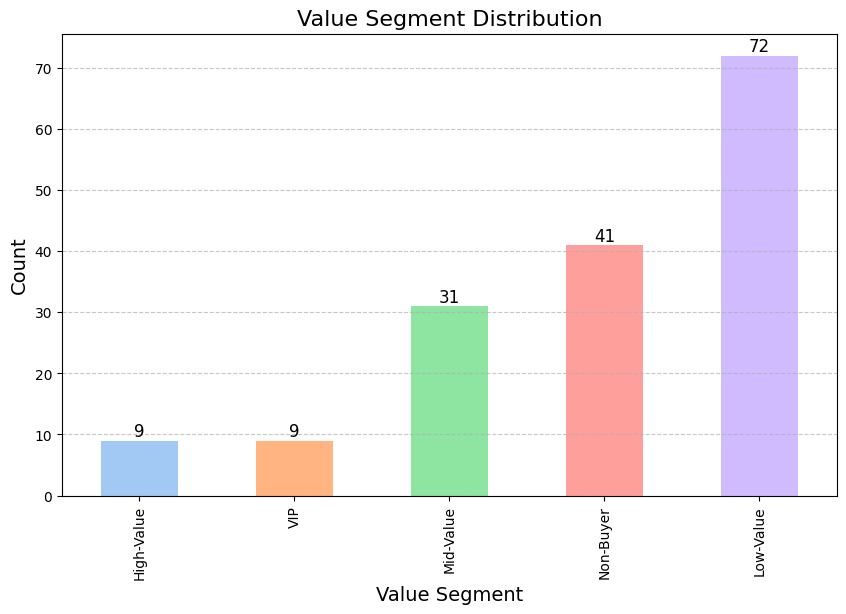

In [23]:
# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
ax = rfm_final.Value_Segment.value_counts().sort_values().plot(kind='bar', color=sns.color_palette("pastel"))

# Customize the plot
ax.set_title('Value Segment Distribution', fontsize=16)  # Add a title with font size
ax.set_xlabel('Value Segment', fontsize=14)              # Add x-label with font size
ax.set_ylabel('Count', fontsize=14)                       # Add y-label with font size
ax.grid(axis='y', linestyle='--', alpha=0.7)             # Add gridlines for better readability

# Show value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

In [24]:
rfm_final.drop(columns=['r_quartile','f_quartile','m_quartile'], inplace=True)


In [25]:
rfm_final.to_csv('rfm_finalone.csv', index=False)

In [26]:
print(rfm_final.shape)
rfm_final[rfm_final['Value_Segment'] == 'VIP']

(162, 8)


,Code,Name,LastPurchaseDate,FREQUENCY,MONETARY,RECENCY,RFM_Score,Value_Segment
12,PL000158C,BANG Kransysteme GmbH Co. KG,2025-04-13,12,2022629.36,17,111,VIP
50,PL000119C,Al-Kifah Precast Company,2025-02-27,4,170543.85,62,111,VIP
59,PL000108C,Gulf Packaging Industries Co.,2025-02-20,17,252956.88,69,111,VIP
71,PL000096C,Sulb Al Jazeera Concrete Manufacturing,2025-02-17,15,461683.14,72,111,VIP
82,PL000084C,Hussien Omar Al- Attas Factory Company,2024-12-17,7,3617507.40,134,111,VIP
117,PL000049C,MASDAR BUILDING MATERIALS,2025-04-13,33,625521.00,17,111,VIP
119,PL000047C,TAMEER STEEL FACTORY,2025-03-17,27,1320528.07,44,111,VIP
134,000031,Mitwalli Steel Products Factory Co,2025-03-13,8,640294.01,48,111,VIP
140,000025,Advanced Water Technology Company Rawafid Indu...,2025-01-21,6,1057309.17,99,111,VIP
